In [1]:
import csv, matplotlib.pyplot as plt

# Loeme standardi sisse

In [2]:
standard = dict()

#Vaadake, et standard on samas kaustas või muutke koodi!!
with open("syno-gold.csv","r", encoding = "UTF-8") as f:
    for rida in f:
        sõna, sarnane_sõna = rida.split("\t")
        if sõna not in standard:
            standard[sõna] = []
        standard[sõna].append(sarnane_sõna.strip())  
        
        

In [3]:
print("Standardis on",len(standard),"sõna.")
standard["abitu"][:5]

Standardis on 38818 sõna.


['nõrk', 'kaitsetu', 'hädine', 'hädaline', 'väeti']

# Loeme mudeli sisse

In [4]:
fail = "model_2.csv" #Muuta vastavalt vajadusele!!

mudel = dict()
with open(fail, "r", encoding = "UTF-8") as f:
    for sõna,sarnane_sõna,skoor in csv.reader(f,quotechar='"', delimiter=',', quoting=csv.QUOTE_ALL):
        if sõna not in mudel:
            mudel[sõna] = []
        mudel[sõna].append(sarnane_sõna)  
    

In [5]:
print("Mudelis on",len(mudel),"sõna.")
mudel["abitu"][:5]

Mudelis on 200000 sõna.


['jõuetu', 'kaitsetu', 'saamatu', 'mittemõistetu', 'pampersilaps']

# Võrdlemine

Võrdleme standardiga järgmise loogika järgi.
* Vaatame läbi standardi kõik sõnad.
* Kui sõna sisaldub mudelis, siis uurime, kas standardi kõige sarnasem sõna sisaldub mudelis sarnastes sõnades.
* Saame mingi hinnangu, kui tihti see juhtub.
* Seejärel teeme sama asja standardi teisele kõige sarnasemale sõnale jne

In [6]:
print("Standardi sõnadest",sum([sõna in mudel for sõna in standard]),"esineb mudelis.")        

Standardi sõnadest 21642 esineb mudelis.


Nagu näha, me saame ainult teha võrdlust nende 21 642 sõna abil.

In [7]:
#Parameetrid
# mudel, mida standardiga võrdleme
# standard, millega võrdleme
# n - mitu sarnast sõna me standardist võtame
# piir - kui paljude sarnaste sõnade seast me mudelis uurime
#        näiteks, meid ehk ei huvita, kui standardi järgi kõige sarnasem sõna
#        on mudeli arvates sarnasuselt viiekümnes
#        vaikeväärtus : 100 (ehk praktiliselt mitte piirav)
# tagastaProtsent - saame valida, kas tahame tagastusväärtusena protsenti või ennikut

def võrdle(mudel,standard, n=1, piir = 100, tagastaProtsent = True):
    
    success = 0
    counter = 0
    
    for sõna in standard:
        
        if sõna in mudel:
            i = 0
            while i < n and i<len(standard[sõna]):
                counter += 1
                if standard[sõna][i] in mudel[sõna][:piir]:
                    success += 1                
                i+= 1
    
    if tagastaProtsent:
        return success/counter
    
    return success,counter

In [8]:
#Visualiseerib mudeli
#Parameetrid
# standard, millega võrdleme
# mudel, mida võrdleme standardiga
# N - kui palju erinevaid sõnade arve me proovime
#     vaikeväärtus : 10

def joonistaMudel(standard, mudel, N=10):
    võrdlused = []
    for n in range(1,N+1):
        p = võrdle(mudel, standard, n)
        võrdlused.append(p)
        
    plt.bar([i+1 for i in range(N)], height = võrdlused, width = .5)
    plt.xticks([i+1 for i in range(N)])
    plt.ylabel("Edukalt leitud sõnu / otsitud sõnu")
    plt.xlabel("Mitu sarnast sõna standardist võeti")
    plt.show()
    

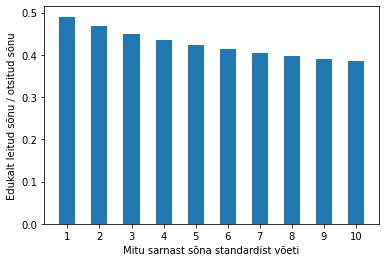

In [9]:
joonistaMudel(standard, mudel)
    

In [10]:
def loeMudel(fail):
    mudel = dict()
    with open(fail, "r", encoding = "UTF-8") as f:
        for sõna,sarnane_sõna,skoor in csv.reader(f,quotechar='"', delimiter=',', quoting=csv.QUOTE_ALL):
            if sõna not in mudel:
                mudel[sõna] = []
            mudel[sõna].append(sarnane_sõna) 
    return mudel


In [11]:
cbow = loeMudel("W2V_100d_5epoch_CBOW_200000topN.csv")
sg   = loeMudel("W2V_1000d_20epoch_SG_200000topN.csv")

In [20]:
def võrdleMudeleid(mudel1,mudel2, standard, N = 10):
    
    võrdlused1 = []
    võrdlused2 = []
    for n in range(1,N+1):
        p = võrdle(mudel1, standard, n)
        võrdlused1.append(p)
        p = võrdle(mudel2, standard, n)
        võrdlused2.append(p)
        
    plt.bar([i+1.1 for i in range(N)], height = võrdlused1, width = .2, color = "red", label = "tere")
    
    plt.bar([i+.9 for i in range(N)], height = võrdlused2, width = .2, color = "blue")
    
    plt.xticks([i+1 for i in range(N)])
    plt.ylabel("Edukalt leitud sõnu / otsitud sõnu")
    plt.xlabel("Mitu sarnast sõna standardist võeti")
    plt.show()
    


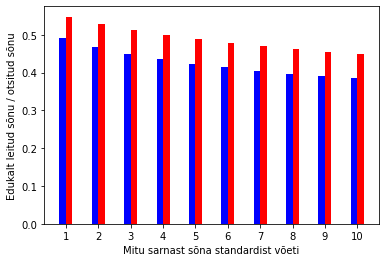

In [21]:
võrdleMudeleid(cbow,sg,standard)